<a href="https://colab.research.google.com/github/jenny005/Langgraph-Tutorial/blob/main/Copy_of_05_chatbot_messages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -r /content/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.7/68.7 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.2/153.2 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.4/74.4 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 68.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 64.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.2/

In [1]:
from dotenv import load_dotenv  # load environment variables from a .env file into your program’s os.environ dictionary
load_dotenv("/content/.env", override=True)

True

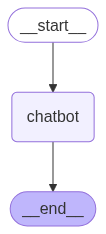

In [2]:
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage, SystemMessage
from langgraph.graph import MessagesState
from langgraph.graph import START, END, StateGraph
from IPython.display import Image, display
from langgraph.checkpoint.memory import MemorySaver
import json


# OPENAI_API_KEY environment variable must be set
llm = ChatOpenAI(model="gpt-4o-mini")


# Defining Agent's node
##################################################################################

# System message
chatbot_system_message = SystemMessage(content=("""
You are a helpful and knowledgeable chatbot assistant.
Your goal is to provide clear and accurate answers to user questions based on the information they provide.
Stay focused, concise, and ensure your responses are relevant to the context of the conversation.
If you don’t have enough information, ask for clarification.”
"""))

# Node
def chatbot(state: MessagesState):
   return {"messages": [llm.invoke([chatbot_system_message] + state["messages"])]}


# Defining Graph
##################################################################################

builder = StateGraph(MessagesState)
builder.add_node("chatbot", chatbot)


# Define edges: these determine how the control flow moves
builder.add_edge(START, "chatbot")
builder.add_edge("chatbot", END)

memory = MemorySaver()
chatbot_graph = builder.compile(checkpointer=memory)

# Show
display(Image(chatbot_graph.get_graph(xray=True).draw_mermaid_png()))

In [4]:
thread_id = "2" # checkpoints are saved to a thread which can be accessed after graph execution

config = {"configurable": {"thread_id": thread_id}} # when invoking a graph with checkpointer, you must specify a thread_id as part of configurable pointion of the config

chatbot_graph.invoke({"messages": [HumanMessage(content="Hi, I’m working on a Python project, and I’m stuck with handling API responses.")]}, config)

{'messages': [HumanMessage(content='Hi, I’m working on a Python project, and I’m stuck with handling API responses.', additional_kwargs={}, response_metadata={}, id='02a740cc-0eab-4d19-8ded-641ae8df7b4c'),
  AIMessage(content="I can help with that! Could you provide more details about the specific issues you're facing with the API responses? For example, are you having trouble with parsing the response, handling errors, or something else?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 41, 'prompt_tokens': 89, 'total_tokens': 130, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_51db84afab', 'id': 'chatcmpl-C4ou32ZHs7anUPVu2sWZNMuNZ6hNa', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--701

In [5]:
chatbot_graph.invoke({"messages": [HumanMessage(content="Sorry what was my previous question?")]}, config)

{'messages': [HumanMessage(content='Hi, I’m working on a Python project, and I’m stuck with handling API responses.', additional_kwargs={}, response_metadata={}, id='02a740cc-0eab-4d19-8ded-641ae8df7b4c'),
  AIMessage(content="I can help with that! Could you provide more details about the specific issues you're facing with the API responses? For example, are you having trouble with parsing the response, handling errors, or something else?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 41, 'prompt_tokens': 89, 'total_tokens': 130, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_51db84afab', 'id': 'chatcmpl-C4ou32ZHs7anUPVu2sWZNMuNZ6hNa', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--701

In [6]:
chatbot_graph.invoke({"messages": [HumanMessage(content="Ahh, yeah right! So I’m mostly struggling with parsing JSON responses. Sometimes the structure isn’t what I expect, and it breaks my code.")]}, config)

{'messages': [HumanMessage(content='Hi, I’m working on a Python project, and I’m stuck with handling API responses.', additional_kwargs={}, response_metadata={}, id='02a740cc-0eab-4d19-8ded-641ae8df7b4c'),
  AIMessage(content="I can help with that! Could you provide more details about the specific issues you're facing with the API responses? For example, are you having trouble with parsing the response, handling errors, or something else?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 41, 'prompt_tokens': 89, 'total_tokens': 130, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_51db84afab', 'id': 'chatcmpl-C4ou32ZHs7anUPVu2sWZNMuNZ6hNa', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--701

In [7]:
chatbot_graph.invoke({"messages": [HumanMessage(content="Got it! That helps a lot. What would be the best way to handle deeply nested JSON data when I only need a few specific values?")]}, config)

{'messages': [HumanMessage(content='Hi, I’m working on a Python project, and I’m stuck with handling API responses.', additional_kwargs={}, response_metadata={}, id='02a740cc-0eab-4d19-8ded-641ae8df7b4c'),
  AIMessage(content="I can help with that! Could you provide more details about the specific issues you're facing with the API responses? For example, are you having trouble with parsing the response, handling errors, or something else?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 41, 'prompt_tokens': 89, 'total_tokens': 130, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_51db84afab', 'id': 'chatcmpl-C4ou32ZHs7anUPVu2sWZNMuNZ6hNa', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--701

# Defining your own schema

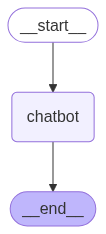

In [8]:
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage, SystemMessage
from langgraph.graph import START, END, StateGraph
from langgraph.checkpoint.memory import MemorySaver
from IPython.display import Image, display

# OPENAI_API_KEY environment variable must be set
llm = ChatOpenAI(model="gpt-4o-mini")

# Defining Schema
##################################################################################
class State(MessagesState):
    question: str
    answer: str


# Defining Agent's node
##################################################################################

# System message
chatbot_system_message = SystemMessage(content=("""
You are a helpful and knowledgeable chatbot assistant.
Your goal is to provide clear and accurate answers to user questions based on the information they provide.
Stay focused, concise, and ensure your responses are relevant to the context of the conversation.
If you don’t have enough information, ask for clarification.”
"""))

# Node
def chatbot(state: State) -> State:
    question = HumanMessage(content=state.get("question", ""))
    response = llm.invoke([chatbot_system_message] + state["messages"] + [question]);

    return State(
        messages = [question, response],
        question = state.get("question", None),
        answer = response.content
    )


# Defining Graph
##################################################################################

builder = StateGraph(State)
builder.add_node("chatbot", chatbot)


# Define edges: these determine how the control flow moves
builder.add_edge(START, "chatbot")
builder.add_edge("chatbot", END)

memory = MemorySaver()
chatbot_graph = builder.compile(checkpointer=memory)

# Show
display(Image(chatbot_graph.get_graph(xray=True).draw_mermaid_png()))

In [9]:
thread_id = "2"

config = {"configurable": {"thread_id": thread_id}}

chatbot_graph.invoke(State(question="Hi, I’m working on a Python project, and I’m stuck with handling API responses."), config)

{'messages': [HumanMessage(content='Hi, I’m working on a Python project, and I’m stuck with handling API responses.', additional_kwargs={}, response_metadata={}, id='6df4ed60-af43-4348-81c8-daf301d8efa4'),
  AIMessage(content='I’d be happy to help! Could you provide more details about what specific issues you’re encountering with handling API responses? Are you having trouble making the request, parsing the response, or something else?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 40, 'prompt_tokens': 89, 'total_tokens': 129, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-C4oxbBpaZ7osrygYhRHoxlm8DYC74', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--75a519

In [10]:
chatbot_graph.invoke(State(question="Sorry what was my previous question?"), config)

{'messages': [HumanMessage(content='Hi, I’m working on a Python project, and I’m stuck with handling API responses.', additional_kwargs={}, response_metadata={}, id='6df4ed60-af43-4348-81c8-daf301d8efa4'),
  AIMessage(content='I’d be happy to help! Could you provide more details about what specific issues you’re encountering with handling API responses? Are you having trouble making the request, parsing the response, or something else?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 40, 'prompt_tokens': 89, 'total_tokens': 129, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-C4oxbBpaZ7osrygYhRHoxlm8DYC74', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--75a519

In [11]:
chatbot_graph.invoke(State(question="Ahh, yeah right! So I’m mostly struggling with parsing JSON responses. Sometimes the structure isn’t what I expect, and it breaks my code."), config)

{'messages': [HumanMessage(content='Hi, I’m working on a Python project, and I’m stuck with handling API responses.', additional_kwargs={}, response_metadata={}, id='6df4ed60-af43-4348-81c8-daf301d8efa4'),
  AIMessage(content='I’d be happy to help! Could you provide more details about what specific issues you’re encountering with handling API responses? Are you having trouble making the request, parsing the response, or something else?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 40, 'prompt_tokens': 89, 'total_tokens': 129, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-C4oxbBpaZ7osrygYhRHoxlm8DYC74', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--75a519

In [12]:
chatbot_graph.invoke(State(question="Got it! That helps a lot. What would be the best way to handle deeply nested JSON data when I only need a few specific values?"), config)

{'messages': [HumanMessage(content='Hi, I’m working on a Python project, and I’m stuck with handling API responses.', additional_kwargs={}, response_metadata={}, id='6df4ed60-af43-4348-81c8-daf301d8efa4'),
  AIMessage(content='I’d be happy to help! Could you provide more details about what specific issues you’re encountering with handling API responses? Are you having trouble making the request, parsing the response, or something else?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 40, 'prompt_tokens': 89, 'total_tokens': 129, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-C4oxbBpaZ7osrygYhRHoxlm8DYC74', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--75a519

# Message Shrinking

## Limit number of messages

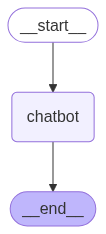

In [13]:
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage, SystemMessage
from langgraph.graph import START, END, StateGraph
from langgraph.checkpoint.memory import MemorySaver
from IPython.display import Image, display

# OPENAI_API_KEY environment variable must be set
llm = ChatOpenAI(model="gpt-4o-mini")

# Defining Schema
##################################################################################
class State(MessagesState):
    question: str
    answer: str


# Defining Agent's node
##################################################################################

# System message
chatbot_system_message = SystemMessage(content=("""
You are a helpful and knowledgeable chatbot assistant.
Your goal is to provide clear and accurate answers to user questions based on the information they provide.
Stay focused, concise, and ensure your responses are relevant to the context of the conversation.
If you don’t have enough information, ask for clarification.”
"""))

# Node
def chatbot(state: State) -> State:
    question = HumanMessage(content=state.get("question", ""))

    trimed_messages = (state["messages"] + [question])[-4:]
    print(f"Messages sent to LLM: {len(trimed_messages)}")

    response = llm.invoke([chatbot_system_message] + trimed_messages);

    return State(
        messages = [question, response],
        question = state.get("question", None),
        answer = response.content
    )


# Defining Graph
##################################################################################

builder = StateGraph(State)
builder.add_node("chatbot", chatbot)


# Define edges: these determine how the control flow moves
builder.add_edge(START, "chatbot")
builder.add_edge("chatbot", END)

memory = MemorySaver()
chatbot_graph = builder.compile(checkpointer=memory)

# Show
display(Image(chatbot_graph.get_graph(xray=True).draw_mermaid_png()))

In [14]:
thread_id = "1"

config = {"configurable": {"thread_id": thread_id}}

chatbot_graph.invoke(State(question="Hi, I’m working on a Python project, and I’m stuck with handling API responses."), config)

Messages sent to LLM: 1


{'messages': [HumanMessage(content='Hi, I’m working on a Python project, and I’m stuck with handling API responses.', additional_kwargs={}, response_metadata={}, id='be417f7d-0173-4526-92ff-a27d8732ff9f'),
  AIMessage(content="I'd be happy to help! Could you provide more details on the specific issues you're facing with handling API responses in your Python project? Are you having trouble with parsing the response, managing errors, or something else?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 42, 'prompt_tokens': 89, 'total_tokens': 131, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-C4oylEOC5TQvFIH7lwYIc59jcpQdr', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, 

In [15]:
chatbot_graph.invoke(State(question="Sorry what was my previous question?"), config)

Messages sent to LLM: 3


{'messages': [HumanMessage(content='Hi, I’m working on a Python project, and I’m stuck with handling API responses.', additional_kwargs={}, response_metadata={}, id='be417f7d-0173-4526-92ff-a27d8732ff9f'),
  AIMessage(content="I'd be happy to help! Could you provide more details on the specific issues you're facing with handling API responses in your Python project? Are you having trouble with parsing the response, managing errors, or something else?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 42, 'prompt_tokens': 89, 'total_tokens': 131, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-C4oylEOC5TQvFIH7lwYIc59jcpQdr', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, 

In [16]:
chatbot_graph.invoke(State(question="Ahh, yeah right! So I’m mostly struggling with parsing JSON responses. Sometimes the structure isn’t what I expect, and it breaks my code."), config)

Messages sent to LLM: 4


{'messages': [HumanMessage(content='Hi, I’m working on a Python project, and I’m stuck with handling API responses.', additional_kwargs={}, response_metadata={}, id='be417f7d-0173-4526-92ff-a27d8732ff9f'),
  AIMessage(content="I'd be happy to help! Could you provide more details on the specific issues you're facing with handling API responses in your Python project? Are you having trouble with parsing the response, managing errors, or something else?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 42, 'prompt_tokens': 89, 'total_tokens': 131, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-C4oylEOC5TQvFIH7lwYIc59jcpQdr', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, 

## Trim messages

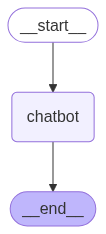

In [19]:
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage, SystemMessage
from langgraph.graph import START, END, StateGraph
from langgraph.checkpoint.memory import MemorySaver
from IPython.display import Image, display
from langchain_core.messages import trim_messages

# OPENAI_API_KEY environment variable must be set
llm = ChatOpenAI(model="gpt-4o-mini")

# Defining Schema
##################################################################################
class State(MessagesState):
    question: str
    answer: str


# Defining Agent's node
##################################################################################

# System message
chatbot_system_message = SystemMessage(content=("""
You are a helpful and knowledgeable chatbot assistant.
Your goal is to provide clear and accurate answers to user questions based on the information they provide.
Stay focused, concise, and ensure your responses are relevant to the context of the conversation.
If you don’t have enough information, ask for clarification.”
"""))

# Node
def chatbot(state: State) -> State:
    question = HumanMessage(content=state.get("question", ""))

    trimed_messages = trim_messages(
            state["messages"] + [question],
            max_tokens=200,                # keep 4-5 messages including longer detailed responses
            strategy="last",                # keep the most recent
            token_counter=llm,              # the model used to count tokens
            allow_partial=False             # only include complete messages (preserve message integrity)
        )
    print(f"Messages sent to LLM: {len(trimed_messages)}")

    response = llm.invoke([chatbot_system_message] + trimed_messages);

    return State(
        messages = [question, response],
        question = state.get("question", None),
        answer = response.content
    )


# Defining Graph
##################################################################################

builder = StateGraph(State)
builder.add_node("chatbot", chatbot)


# Define edges: these determine how the control flow moves
builder.add_edge(START, "chatbot")
builder.add_edge("chatbot", END)

memory = MemorySaver()
chatbot_graph = builder.compile(checkpointer=memory)

# Show
display(Image(chatbot_graph.get_graph(xray=True).draw_mermaid_png()))

In [20]:
thread_id = "3"

config = {"configurable": {"thread_id": thread_id}}

chatbot_graph.invoke(State(question="Hi, I’m working on a Python project, and I’m stuck with handling API responses."), config)

Messages sent to LLM: 1


{'messages': [HumanMessage(content='Hi, I’m working on a Python project, and I’m stuck with handling API responses.', additional_kwargs={}, response_metadata={}, id='bfc5d463-aea8-4869-bd86-f029f74ac812'),
  AIMessage(content='Sure, I can help with that! Could you provide more details about the API you’re working with and the specific issues you’re encountering with handling the responses?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 32, 'prompt_tokens': 89, 'total_tokens': 121, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-C4p56VxJnmndWvPREXyKLEZ6JyUky', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--6627d7dd-9fd3-431f-adf0-6e9ee659f646-0', usage_metada

In [21]:
chatbot_graph.invoke(State(question="Sorry what was my previous question?"), config)

Messages sent to LLM: 3


{'messages': [HumanMessage(content='Hi, I’m working on a Python project, and I’m stuck with handling API responses.', additional_kwargs={}, response_metadata={}, id='bfc5d463-aea8-4869-bd86-f029f74ac812'),
  AIMessage(content='Sure, I can help with that! Could you provide more details about the API you’re working with and the specific issues you’re encountering with handling the responses?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 32, 'prompt_tokens': 89, 'total_tokens': 121, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-C4p56VxJnmndWvPREXyKLEZ6JyUky', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--6627d7dd-9fd3-431f-adf0-6e9ee659f646-0', usage_metada

In [22]:
chatbot_graph.invoke(State(question="Ahh, yeah right! So I’m mostly struggling with parsing JSON responses. Sometimes the structure isn’t what I expect, and it breaks my code."), config)

Messages sent to LLM: 5


{'messages': [HumanMessage(content='Hi, I’m working on a Python project, and I’m stuck with handling API responses.', additional_kwargs={}, response_metadata={}, id='bfc5d463-aea8-4869-bd86-f029f74ac812'),
  AIMessage(content='Sure, I can help with that! Could you provide more details about the API you’re working with and the specific issues you’re encountering with handling the responses?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 32, 'prompt_tokens': 89, 'total_tokens': 121, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-C4p56VxJnmndWvPREXyKLEZ6JyUky', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--6627d7dd-9fd3-431f-adf0-6e9ee659f646-0', usage_metada

In [23]:
chatbot_graph.invoke(State(question="Got it! That helps a lot. What would be the best way to handle deeply nested JSON data when I only need a few specific values?"), config)

Messages sent to LLM: 1


{'messages': [HumanMessage(content='Hi, I’m working on a Python project, and I’m stuck with handling API responses.', additional_kwargs={}, response_metadata={}, id='bfc5d463-aea8-4869-bd86-f029f74ac812'),
  AIMessage(content='Sure, I can help with that! Could you provide more details about the API you’re working with and the specific issues you’re encountering with handling the responses?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 32, 'prompt_tokens': 89, 'total_tokens': 121, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-C4p56VxJnmndWvPREXyKLEZ6JyUky', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--6627d7dd-9fd3-431f-adf0-6e9ee659f646-0', usage_metada

let's allow partial!